## <font color = darkblue> The starter program provides code for various tree based models
    - It also includes
        - Randomized grid search
        - Variable importance information
        - Pickling the model and calling it back
    - Make sure to pip install xgboost


In [94]:
# -------------------------
# Import dependencies
# -------------------------

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler

In [95]:
# -------------------------
# Load Redfin Housing Data
# -------------------------

redfin = pd.read_csv("Redfin_CIty_Health_Me_NH_Dec3_2023.csv")

redfin


,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,...,PHLTH_Adj95CI,SLEEP_AdjPrev,SLEEP_Adj95CI,STROKE_CrudePrev,STROKE_Crude95CI,STROKE_AdjPrev,STROKE_Adj95CI,TEETHLOST_AdjPrev,TEETHLOST_Adj95CI,Geolocation
0,Single Family Residential,16 Birchwood Ave,Yarmouth,ME,4096,635000,3.0,2.0,Yarmouth,1512.0,...,"( 5.6, 7.0)",27.0,"(25.7, 28.3)",2.3,"( 2.0, 2.5)",1.8,"( 1.6, 2.1)",7.9,"( 4.7, 12.2)",POINT (-70.19074547 43.7984963)
1,Single Family Residential,83 Kindred Way,Yarmouth,ME,4096,1050000,3.0,2.5,Yarmouth,3735.0,...,"( 5.6, 7.0)",27.0,"(25.7, 28.3)",2.3,"( 2.0, 2.5)",1.8,"( 1.6, 2.1)",7.9,"( 4.7, 12.2)",POINT (-70.19074547 43.7984963)
2,Single Family Residential,21 Hilltop Cir,Yarmouth,ME,4096,625000,3.0,1.0,Yarmouth,1800.0,...,"( 5.6, 7.0)",27.0,"(25.7, 28.3)",2.3,"( 2.0, 2.5)",1.8,"( 1.6, 2.1)",7.9,"( 4.7, 12.2)",POINT (-70.19074547 43.7984963)
3,Single Family Residential,276 Portland St,Yarmouth,ME,4096,399000,3.0,1.0,Yarmouth,1125.0,...,"( 5.6, 7.0)",27.0,"(25.7, 28.3)",2.3,"( 2.0, 2.5)",1.8,"( 1.6, 2.1)",7.9,"( 4.7, 12.2)",POINT (-70.19074547 43.7984963)
4,Single Family Residential,294 Portland St,Yarmouth,ME,4096,560000,3.0,2.0,Yarmouth,1120.0,...,"( 5.6, 7.0)",27.0,"(25.7, 28.3)",2.3,"( 2.0, 2.5)",1.8,"( 1.6, 2.1)",7.9,"( 4.7, 12.2)",POINT (-70.19074547 43.7984963)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,Mobile/Manufactured Home,19 Rest Haven Cir,Alfred,ME,4002,104900,2.0,1.0,Alfred,1100.0,...,"( 7.7, 9.6)",33.4,"(31.9, 34.8)",3.3,"( 2.8, 3.7)",2.6,"( 2.2, 2.9)",16.3,"(10.5, 22.7)",POINT (-70.71998917 43.47674361)
2372,Mobile/Manufactured Home,32 Middle Branch Dr,Alfred,ME,4002,349900,3.0,2.0,Alfred,1152.0,...,"( 7.7, 9.6)",33.4,"(31.9, 34.8)",3.3,"( 2.8, 3.7)",2.6,"( 2.2, 2.9)",16.3,"(10.5, 22.7)",POINT (-70.71998917 43.47674361)
2373,Single Family Residential,13 East Branch Dr,Alfred,ME,4002,639900,3.0,2.5,Alfred,3504.0,...,"( 7.7, 9.6)",33.4,"(31.9, 34.8)",3.3,"( 2.8, 3.7)",2.6,"( 2.2, 2.9)",16.3,"(10.5, 22.7)",POINT (-70.71998917 43.47674361)
2374,Single Family Residential,405 Mouse Ln,Alfred,ME,4002,450000,3.0,2.0,Alfred,1188.0,...,"( 7.7, 9.6)",33.4,"(31.9, 34.8)",3.3,"( 2.8, 3.7)",2.6,"( 2.2, 2.9)",16.3,"(10.5, 22.7)",POINT (-70.71998917 43.47674361)


In [96]:
redfin.columns

Index(['PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE',
       'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS', 'LOCATION',
       'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'MLS#', 'LATITUDE', 'LONGITUDE',
       'TotalPopulation', 'ACCESS2_AdjPrev', 'ACCESS2_Adj95CI',
       'ARTHRITIS_AdjPrev', 'ARTHRITIS_Adj95CI', 'BINGE_AdjPrev',
       'BINGE_Adj95CI', 'BPHIGH_AdjPrev', 'BPHIGH_Adj95CI', 'BPMED_AdjPrev',
       'BPMED_Adj95CI', 'CANCER_AdjPrev', 'CANCER_Adj95CI', 'CASTHMA_AdjPrev',
       'CASTHMA_Adj95CI', 'CERVICAL_AdjPrev', 'CERVICAL_Adj95CI',
       'CHD_AdjPrev', 'CHD_Adj95CI', 'CHECKUP_AdjPrev', 'CHECKUP_Adj95CI',
       'CHOLSCREEN_AdjPrev', 'CHOLSCREEN_Adj95CI', 'COLON_SCREEN_AdjPrev',
       'COLON_SCREEN_Adj95CI', 'COPD_AdjPrev', 'COPD_Adj95CI', 'COREM_AdjPrev',
       'COREM_Adj95CI', 'COREW_AdjPrev', 'COREW_Adj95CI', 'CSMOKING_AdjPrev',
       'CSMOKING_Adj95CI', 'DENTAL_AdjPrev', 'DENTAL_Adj95CI',
       'DE

In [97]:
# identify features excluding '$/SQUARE FEET'
redfin_2 = redfin.loc[:, ['PROPERTY TYPE', 'STATE OR PROVINCE',
       'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
                          'LATITUDE', 'LONGITUDE', 'TotalPopulation', 'ACCESS2_AdjPrev', 'ARTHRITIS_AdjPrev',
             'CANCER_AdjPrev', 'CSMOKING_AdjPrev', 'DEPRESSION_AdjPrev', 'DIABETES_AdjPrev', 'OBESITY_AdjPrev',
             'MHLTH_AdjPrev', 'PHLTH_AdjPrev']]  
                         
redfin_2
                                    

,PROPERTY TYPE,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,...,TotalPopulation,ACCESS2_AdjPrev,ARTHRITIS_AdjPrev,CANCER_AdjPrev,CSMOKING_AdjPrev,DEPRESSION_AdjPrev,DIABETES_AdjPrev,OBESITY_AdjPrev,MHLTH_AdjPrev,PHLTH_AdjPrev
0,Single Family Residential,ME,4096,635000,3.0,2.0,1512.0,9583.0,1974.0,6,...,5869,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3
1,Single Family Residential,ME,4096,1050000,3.0,2.5,3735.0,16988.0,2017.0,11,...,5869,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3
2,Single Family Residential,ME,4096,625000,3.0,1.0,1800.0,14374.0,1975.0,13,...,5869,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3
3,Single Family Residential,ME,4096,399000,3.0,1.0,1125.0,20037.0,1975.0,13,...,5869,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3
4,Single Family Residential,ME,4096,560000,3.0,2.0,1120.0,12632.0,1955.0,32,...,5869,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,Mobile/Manufactured Home,ME,4002,104900,2.0,1.0,1100.0,NaN,1975.0,2,...,777,14.2,24.8,6.1,19.2,24.8,7.4,30.2,15.3,8.7
2372,Mobile/Manufactured Home,ME,4002,349900,3.0,2.0,1152.0,70567.0,2003.0,3,...,777,14.2,24.8,6.1,19.2,24.8,7.4,30.2,15.3,8.7
2373,Single Family Residential,ME,4002,639900,3.0,2.5,3504.0,80586.0,2023.0,4,...,777,14.2,24.8,6.1,19.2,24.8,7.4,30.2,15.3,8.7
2374,Single Family Residential,ME,4002,450000,3.0,2.0,1188.0,60112.0,2012.0,12,...,777,14.2,24.8,6.1,19.2,24.8,7.4,30.2,15.3,8.7


In [120]:
redfin_2.columns

Index(['PROPERTY TYPE', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE',
       'BEDS', 'BATHS', 'SQUARE FEET', 'YEAR BUILT', 'DAYS ON MARKET',
       'LATITUDE', 'LONGITUDE', 'TotalPopulation', 'ACCESS2_AdjPrev',
       'ARTHRITIS_AdjPrev', 'CANCER_AdjPrev', 'CSMOKING_AdjPrev',
       'DEPRESSION_AdjPrev', 'DIABETES_AdjPrev', 'OBESITY_AdjPrev',
       'MHLTH_AdjPrev', 'PHLTH_AdjPrev', 'PRICE_BINARY'],
      dtype='object')

In [98]:
# Recategorize the target variable into binary classes
median_price = np.median(redfin_2['PRICE'])
redfin_2['PRICE_BINARY'] = (redfin_2['PRICE'] > median_price).astype(int)  # 1 for above median, 0 for below

redfin_2

,PROPERTY TYPE,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,...,ACCESS2_AdjPrev,ARTHRITIS_AdjPrev,CANCER_AdjPrev,CSMOKING_AdjPrev,DEPRESSION_AdjPrev,DIABETES_AdjPrev,OBESITY_AdjPrev,MHLTH_AdjPrev,PHLTH_AdjPrev,PRICE_BINARY
0,Single Family Residential,ME,4096,635000,3.0,2.0,1512.0,9583.0,1974.0,6,...,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3,1
1,Single Family Residential,ME,4096,1050000,3.0,2.5,3735.0,16988.0,2017.0,11,...,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3,1
2,Single Family Residential,ME,4096,625000,3.0,1.0,1800.0,14374.0,1975.0,13,...,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3,1
3,Single Family Residential,ME,4096,399000,3.0,1.0,1125.0,20037.0,1975.0,13,...,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3,0
4,Single Family Residential,ME,4096,560000,3.0,2.0,1120.0,12632.0,1955.0,32,...,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,Mobile/Manufactured Home,ME,4002,104900,2.0,1.0,1100.0,NaN,1975.0,2,...,14.2,24.8,6.1,19.2,24.8,7.4,30.2,15.3,8.7,0
2372,Mobile/Manufactured Home,ME,4002,349900,3.0,2.0,1152.0,70567.0,2003.0,3,...,14.2,24.8,6.1,19.2,24.8,7.4,30.2,15.3,8.7,0
2373,Single Family Residential,ME,4002,639900,3.0,2.5,3504.0,80586.0,2023.0,4,...,14.2,24.8,6.1,19.2,24.8,7.4,30.2,15.3,8.7,1
2374,Single Family Residential,ME,4002,450000,3.0,2.0,1188.0,60112.0,2012.0,12,...,14.2,24.8,6.1,19.2,24.8,7.4,30.2,15.3,8.7,1


In [99]:
redfin_2.isnull().sum()

PROPERTY TYPE           0
STATE OR PROVINCE       0
ZIP OR POSTAL CODE      0
PRICE                   0
BEDS                   13
BATHS                  16
SQUARE FEET             6
LOT SIZE              431
YEAR BUILT             44
DAYS ON MARKET          0
LATITUDE                0
LONGITUDE               0
TotalPopulation         0
ACCESS2_AdjPrev         0
ARTHRITIS_AdjPrev       0
CANCER_AdjPrev          0
CSMOKING_AdjPrev        0
DEPRESSION_AdjPrev      0
DIABETES_AdjPrev        0
OBESITY_AdjPrev         0
MHLTH_AdjPrev           0
PHLTH_AdjPrev           0
PRICE_BINARY            0
dtype: int64

In [100]:
# drop columns with high NAs
redfin_2 = redfin_2.drop(columns = ['LOT SIZE'])

# drop remaining NAs
redfin_2 = redfin_2.dropna()

redfin_2

,PROPERTY TYPE,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,YEAR BUILT,DAYS ON MARKET,LATITUDE,...,ACCESS2_AdjPrev,ARTHRITIS_AdjPrev,CANCER_AdjPrev,CSMOKING_AdjPrev,DEPRESSION_AdjPrev,DIABETES_AdjPrev,OBESITY_AdjPrev,MHLTH_AdjPrev,PHLTH_AdjPrev,PRICE_BINARY
0,Single Family Residential,ME,4096,635000,3.0,2.0,1512.0,1974.0,6,43.761294,...,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3,1
1,Single Family Residential,ME,4096,1050000,3.0,2.5,3735.0,2017.0,11,43.797566,...,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3,1
2,Single Family Residential,ME,4096,625000,3.0,1.0,1800.0,1975.0,13,43.802904,...,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3,1
3,Single Family Residential,ME,4096,399000,3.0,1.0,1125.0,1975.0,13,43.791090,...,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3,0
4,Single Family Residential,ME,4096,560000,3.0,2.0,1120.0,1955.0,32,43.790622,...,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,Mobile/Manufactured Home,ME,4002,104900,2.0,1.0,1100.0,1975.0,2,43.423215,...,14.2,24.8,6.1,19.2,24.8,7.4,30.2,15.3,8.7,0
2372,Mobile/Manufactured Home,ME,4002,349900,3.0,2.0,1152.0,2003.0,3,43.507335,...,14.2,24.8,6.1,19.2,24.8,7.4,30.2,15.3,8.7,0
2373,Single Family Residential,ME,4002,639900,3.0,2.5,3504.0,2023.0,4,43.476499,...,14.2,24.8,6.1,19.2,24.8,7.4,30.2,15.3,8.7,1
2374,Single Family Residential,ME,4002,450000,3.0,2.0,1188.0,2012.0,12,43.440317,...,14.2,24.8,6.1,19.2,24.8,7.4,30.2,15.3,8.7,1


In [101]:
# Print only categorical columns
categorical_columns = redfin_2.select_dtypes(include='object')
print(categorical_columns)

# Perform one-hot encoding on the categorical columns
encoded_features = pd.get_dummies(redfin_2[['PROPERTY TYPE', 'STATE OR PROVINCE']])

# # Drop the original categorical columns
redfin_3 = redfin_2.drop(columns = ['PROPERTY TYPE', 'STATE OR PROVINCE'])

# # Concatenate the encoded features with the rest of the dataframe
redfin_3 = pd.concat([redfin_3, encoded_features], axis=1)
redfin_3


                  PROPERTY TYPE STATE OR PROVINCE
0     Single Family Residential                ME
1     Single Family Residential                ME
2     Single Family Residential                ME
3     Single Family Residential                ME
4     Single Family Residential                ME
...                         ...               ...
2371   Mobile/Manufactured Home                ME
2372   Mobile/Manufactured Home                ME
2373  Single Family Residential                ME
2374  Single Family Residential                ME
2375  Single Family Residential                ME

[2297 rows x 2 columns]


,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,YEAR BUILT,DAYS ON MARKET,LATITUDE,LONGITUDE,TotalPopulation,...,PROPERTY TYPE_Mobile/Manufactured Home,PROPERTY TYPE_Multi-Family (2-4 Unit),PROPERTY TYPE_Multi-Family (5+ Unit),PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Timeshare,PROPERTY TYPE_Townhouse,STATE OR PROVINCE_MA,STATE OR PROVINCE_ME,STATE OR PROVINCE_NH,STATE OR PROVINCE_VT
0,4096,635000,3.0,2.0,1512.0,1974.0,6,43.761294,-70.141766,5869,...,0,0,0,1,0,0,0,1,0,0
1,4096,1050000,3.0,2.5,3735.0,2017.0,11,43.797566,-70.207526,5869,...,0,0,0,1,0,0,0,1,0,0
2,4096,625000,3.0,1.0,1800.0,1975.0,13,43.802904,-70.197578,5869,...,0,0,0,1,0,0,0,1,0,0
3,4096,399000,3.0,1.0,1125.0,1975.0,13,43.791090,-70.190203,5869,...,0,0,0,1,0,0,0,1,0,0
4,4096,560000,3.0,2.0,1120.0,1955.0,32,43.790622,-70.190927,5869,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,4002,104900,2.0,1.0,1100.0,1975.0,2,43.423215,-70.645396,777,...,1,0,0,0,0,0,0,1,0,0
2372,4002,349900,3.0,2.0,1152.0,2003.0,3,43.507335,-70.745787,777,...,1,0,0,0,0,0,0,1,0,0
2373,4002,639900,3.0,2.5,3504.0,2023.0,4,43.476499,-70.716169,777,...,0,0,0,1,0,0,0,1,0,0
2374,4002,450000,3.0,2.0,1188.0,2012.0,12,43.440317,-70.697893,777,...,0,0,0,1,0,0,0,1,0,0


# <font color = blue> Models for BINARY PRICE response

In [102]:
# ------------------------------------------------------
# Split the dataset into training and testing sets
# ------------------------------------------------------

# Selecting Features and Target
y = redfin_3['PRICE_BINARY'] 
X = redfin_3.drop(columns = ['PRICE_BINARY', 'PRICE'])

# # # Feature scaling
# sc = StandardScaler()
# X = sc.fit_transform(X)

# # Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## <font color = green> Decision tree

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight

# ---------------------------------------------------------------
# Train a decision tree classifier on the balanced dataset
# ---------------------------------------------------------------

clf = DecisionTreeClassifier(criterion='gini',
                             min_samples_split=5,
                             min_samples_leaf=5)
clf.fit(X_train, y_train)

# --------------------------------------------
# Evaluate the classifier on the testing set
# --------------------------------------------
y_pred_dt = clf.predict(X_test)
print(classification_report(y_test, y_pred_dt))

confusion_matrix(y_test, y_pred_dt)

# Confusion Matrix
pd.crosstab(y_pred_dt, y_test, rownames =['y_pred_dt'], colnames = ['y_test'] )


# -------------------------------------------------------
# Notes for reading the classification report
# -------------------------------------------------------

# --------------
# Precision: 
# --------------
# Measures the proportion of true positives (TP) out of all predicted positives (TP + false positives (FP)). 
# A high precision means the model makes few false positive predictions.

# --------------
# Recall: 
# --------------
# Measures the proportion of true positives (TP) out of all actual positives (TP + false negatives (FN)). \
# A high recall indicates that the model makes few false negative predictions.

# --------------
# F1-score: 
# --------------
# It is the harmonic mean of precision and recall, calculated as (2 * precision * recall) / (precision + recall). 
# It is useful especially when the classes are imbalanced 

# --------------
# Support: 
# --------------
# It is the number of observations in each class.

# --------------
# Weighted Average: 
# --------------
# It is calculated as the average of the precision, recall etc. weighted by the number of samples in each class.



              precision    recall  f1-score   support

           0       0.81      0.86      0.83       237
           1       0.84      0.78      0.81       223

    accuracy                           0.82       460
   macro avg       0.82      0.82      0.82       460
weighted avg       0.82      0.82      0.82       460



y_test,0,1
y_pred_dt,,
0,203,49
1,34,174


## <font color = green> Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ------------------
# Define the RF model
# ------------------
rf = RandomForestClassifier(n_estimators=200,
                            criterion='entropy',
                            min_samples_split=5,
                            min_samples_leaf=2,
                            max_depth = 20,
                            random_state=100)

# ------------------
# Train the models
# ------------------
rf.fit(X_train, y_train)

# ------------------------------------
# Make predictions on the test set
# ------------------------------------
y_pred_rf = rf.predict(X_test)

# ------------------------------------------------------------------------
# Evaluate the model using accuracy, precision, recall, and F1 score
# ------------------------------------------------------------------------
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Random Forest Precision:', precision_score(y_test, y_pred_rf))
print('Random Forest Recall:', recall_score(y_test, y_pred_rf))
print('Random Forest F1 Score:', f1_score(y_test, y_pred_rf))

print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
pd.crosstab(y_pred_rf, y_test, rownames =['y_pred_rf'], colnames = ['y_test'] )


Random Forest Accuracy: 0.8347826086956521
Random Forest Precision: 0.8266666666666667
Random Forest Recall: 0.8340807174887892
Random Forest F1 Score: 0.8303571428571428
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       237
           1       0.83      0.83      0.83       223

    accuracy                           0.83       460
   macro avg       0.83      0.83      0.83       460
weighted avg       0.83      0.83      0.83       460



y_test,0,1
y_pred_rf,,
0,198,37
1,39,186


## <font color = darkblue> Variable Importance Information

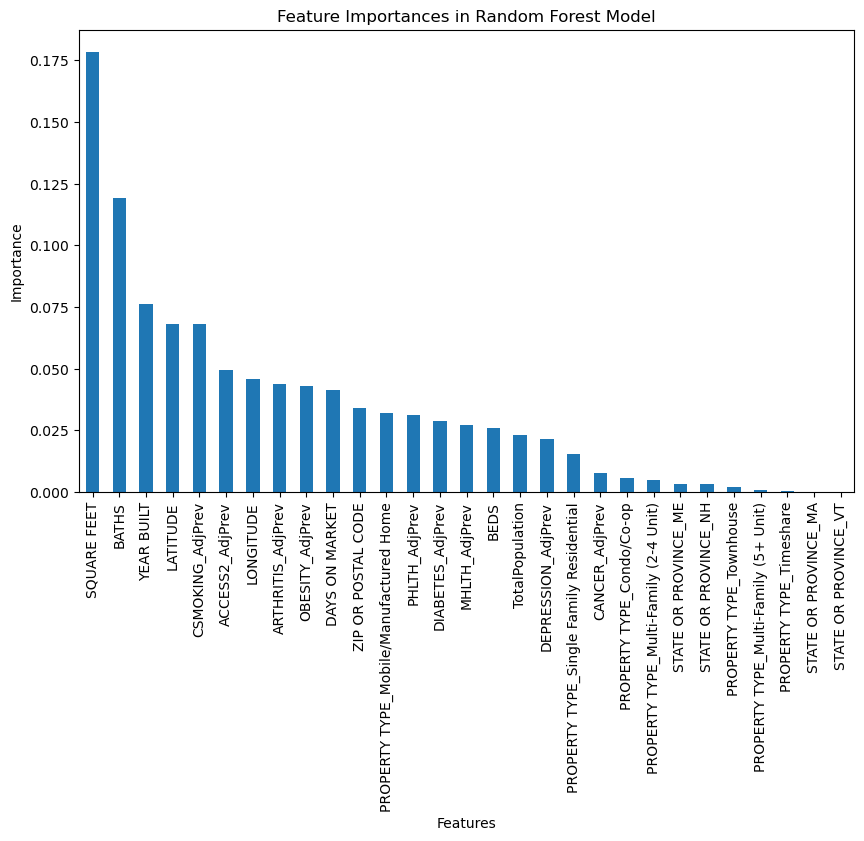

In [105]:
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = rf.feature_importances_

# Create a series with feature names and their importance
features = pd.Series(feature_importances, index = X.columns)

# # Create a series with feature names and their importance
# features = pd.Series(feature_importances, index=range(X_train.shape[1]))

# Sort the features by importance
features = features.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
features.plot(kind='bar')
plt.title('Feature Importances in Random Forest Model')
plt.ylabel('Importance')
plt.xlabel('Features')

plt.show()


## <font color = darkgreen> Gradient Boosting Classifier

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

# ------------------
# Define the GB model
# ------------------
gb = GradientBoostingClassifier(n_estimators=500,
                            min_samples_split=5,
                            learning_rate=0.5,
                            min_samples_leaf=5,
                            random_state=100)

# ------------------
# Train the model
# ------------------
gb.fit(X_train, y_train)

# ------------------------------------
# Make predictions on the test set
# ------------------------------------
y_pred_gb = gb.predict(X_test)

# ------------------------------------------------------------------------
# Evaluate the model using accuracy, precision, recall, and F1 score
# ------------------------------------------------------------------------

print('Gradient Boosting Accuracy:', accuracy_score(y_test, y_pred_gb))
print('Gradient Boosting Precision:', precision_score(y_test, y_pred_gb))
print('Gradient Boosting Recall:', recall_score(y_test, y_pred_gb))
print('Gradient Boosting F1 Score:', f1_score(y_test, y_pred_gb))

print(classification_report(y_test, y_pred_gb))
# Confusion Matrix
pd.crosstab(y_pred_gb, y_test, rownames =['y_pred_gb'], colnames = ['y_test'] )


Gradient Boosting Accuracy: 0.841304347826087
Gradient Boosting Precision: 0.831858407079646
Gradient Boosting Recall: 0.8430493273542601
Gradient Boosting F1 Score: 0.8374164810690423
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       237
           1       0.83      0.84      0.84       223

    accuracy                           0.84       460
   macro avg       0.84      0.84      0.84       460
weighted avg       0.84      0.84      0.84       460



y_test,0,1
y_pred_gb,,
0,199,35
1,38,188


## <font color = Green> XGBoost
    - Documentation and tutorial
    https://xgboost.readthedocs.io/en/stable/tutorials/model.html

In [107]:
# help(xgb)

In [108]:
import xgboost as xgb

# ------------------
# Define the XGB model
# ------------------
xgb = xgb.XGBClassifier(n_estimators=100,
                        max_depth = 10,
                        eta= 0.01,
                        min_child_weight = 5,
                        random_state=100)

# ------------------
# Train the model
# ------------------
xgb.fit(X_train, y_train)

# ------------------------------------
# Make predictions on the test set
# ------------------------------------
y_pred_xgb = xgb.predict(X_test)

# ------------------------------------------------------------------------
# Evaluate the model using accuracy, precision, recall, and F1 score
# ------------------------------------------------------------------------

print('XGB:', accuracy_score(y_test, y_pred_xgb))
print('XGB:', precision_score(y_test, y_pred_xgb))
print('XGB:', recall_score(y_test, y_pred_xgb))
print('XGB:', f1_score(y_test, y_pred_xgb))

print(classification_report(y_test, y_pred_xgb))
# Confusion Matrix
pd.crosstab(y_pred_xgb, y_test, rownames =['y_pred_xgb'], colnames = ['y_test'] )


XGB: 0.8304347826086956
XGB: 0.8310502283105022
XGB: 0.8161434977578476
XGB: 0.823529411764706
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       237
           1       0.83      0.82      0.82       223

    accuracy                           0.83       460
   macro avg       0.83      0.83      0.83       460
weighted avg       0.83      0.83      0.83       460



y_test,0,1
y_pred_xgb,,
0,200,41
1,37,182


# <font color = blue> Models for CONTINUOUS PRICE response


In [109]:
# ------------------------------------------------------
# Split the dataset into training and testing sets
# ------------------------------------------------------

# Selecting Features and Target
y = redfin_3['PRICE'] 
X = redfin_3.drop(columns = ['PRICE_BINARY', 'PRICE'])

# # # Feature scaling
# sc = StandardScaler()
# X = sc.fit_transform(X)

# # Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## <font color = green> Decision tree

In [121]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ---------------------------------------------------------------
# Train a decision tree regressor on the balanced dataset
# ---------------------------------------------------------------
reg = DecisionTreeRegressor(min_samples_split=5, min_samples_leaf=5)
reg.fit(X_train, y_train)

# --------------------------------------------
# Evaluate the regressor on the testing set
# --------------------------------------------
y_pred_dt = reg.predict(X_test)

# Evaluate R-squared (R2)
r_squared = r2_score(y_test, y_pred_dt)
print("Decision Tree R-squared:", r_squared)

# Evaluate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_dt, squared=False)
print("Decision Tree Root Mean Squared Error:", rmse)

Decision Tree R-squared: 0.4365859033341871
Decision Tree Root Mean Squared Error: 227710.87855005777


## <font color = green> Random Forest

In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------
# Define the RF model for regression
# ------------------
rf_reg = RandomForestRegressor(n_estimators=200,
                               min_samples_split=5,
                               min_samples_leaf=2,
                               max_depth = 20,
                               random_state=100)

# ------------------
# Train the model for regression
# ------------------
rf_reg.fit(X_train, y_train)

# ------------------------------------
# Make predictions on the test set
# ------------------------------------
y_pred_rf_reg = rf_reg.predict(X_test)

# ------------------------------------------------
# Evaluate the model using R-squared (R2) and RMSE
# ------------------------------------------------
r2_rf = r2_score(y_test, y_pred_rf_reg)
print('Random Forest R-squared (R2):', r2_rf)

rmse_rf = mean_squared_error(y_test, y_pred_rf_reg, squared=False)
print('Random Forest Root Mean Squared Error (RMSE):', rmse_rf)


Random Forest R-squared (R2): 0.6428518124254254
Random Forest Root Mean Squared Error (RMSE): 181298.474457738


## <font color = darkblue> Randomized Grid Search
    - The code creates a grid of hyperparameters and then runs a randomized cross validation
    - Note the n_iteration parameter in RandomizedSearchCV, which randomly picks n_iter combinations of hyperparameters and runs through them

In [112]:
import pickle
import warnings
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from scipy.stats import randint

# Suppress warning messages
warnings.filterwarnings('ignore')

# Define the Random Forest model
rf_model = RandomForestRegressor(random_state=100)

# ---------------------------------
# Define the hyperparameter grid
# ---------------------------------
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_grid, n_iter=10, cv=5, scoring='r2', random_state=100, n_jobs=-1, return_train_score=True)

# Perform hyperparameter tuning
print("Training Random Forest...")
random_search.fit(X_train, y_train)

# Display the best parameters
best_params = random_search.best_params_
print("\nBest Parameters:", best_params)

# Train the Random Forest model with the best parameters
best_rf_model = RandomForestRegressor(random_state=42, **best_params)
print("Hyperparameters of the Best Model:", best_rf_model.get_params())
best_rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-2 Score:", r2)


# Save all R-2 values and parameter combinations
cv_results_df = pd.DataFrame(random_search.cv_results_)
cv_results_df = cv_results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print("\nAll R-2 values and parameter combinations:")
print(cv_results_df)




Training Random Forest...

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}
Hyperparameters of the Best Model: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
R-2 Score: 0.6439522390968028

All R-2 values and parameter combinations:
                                              params  mean_test_score  \
0  {'n_estimators': 100, 'min_samples_split': 10,...         0.679435   
1  {'n_estimators': 50, 'min_samples_split': 10, ...         0.674115   
2  {'n_estimators': 50, 'min_samples_split': 5, '...         0.676738   
3  {'n_estimators': 200, 'min_samples_split': 10,...         0.680051   
4  {'n_estimators': 200

## <font color = darkblue> Pickling the model and calling it back

In [113]:
# --------------------
# Save the best model
# --------------------
with open('best_rf_model.pkl', 'wb') as f:
    pickle.dump(best_rf_model, f)
print("Best Random Forest model saved as 'best_rf_model.pkl'")

# --------------------
# Load the model from disk
# --------------------
with open('best_rf_model.pkl', 'rb') as f:
    loaded_rf_model = pickle.load(f)

prediction = loaded_rf_model.predict(X_test.iloc[0:])
print("\nPrediction for a new sample:", prediction)

# ------------------------------------------------
# Evaluate the model using R-squared (R2) and RMSE
# ------------------------------------------------
r2_rf = r2_score(y_test, y_pred_rf_reg)
print('Random Forest R-squared (R2):', r2_rf)

rmse_rf = mean_squared_error(y_test, y_pred_rf_reg, squared=False)
print('Random Forest Root Mean Squared Error (RMSE):', rmse_rf)

Best Random Forest model saved as 'best_rf_model.pkl'

Prediction for a new sample: [ 757129.74544084  849327.90259091  719653.19000722  344831.74249098
  147750.2544246  1140681.5833189   197201.83077398  588966.82993254
  532725.23095238  443572.16402035  392697.06769048  319484.82905952
  669703.65723016  249266.21413961  508324.45256621  483806.62250495
  430113.80212835  497853.87905331  253151.90199238  551814.5703631
  249663.47599206  259012.21427575  468662.9070671   314672.46942929
  396506.8075267   732340.53796681  653062.49565873  727140.98570238
  341248.05403644  695617.18404618  197780.76362482  426775.95908608
   19677.5242674   368166.58294178  915243.23446429  418246.64641919
  578139.5900873   797341.15490873  893530.24180628  531320.30406548
  231245.15568624  166557.06557143  310542.82327305  126533.20185408
  217561.50280952  448372.82543723  670170.82762049  578485.05674603
  227731.53954563  586246.79883333  142655.41473016  188350.53815476
 1116562.83869084  4

## <font color = darkblue> Variable Importance Information

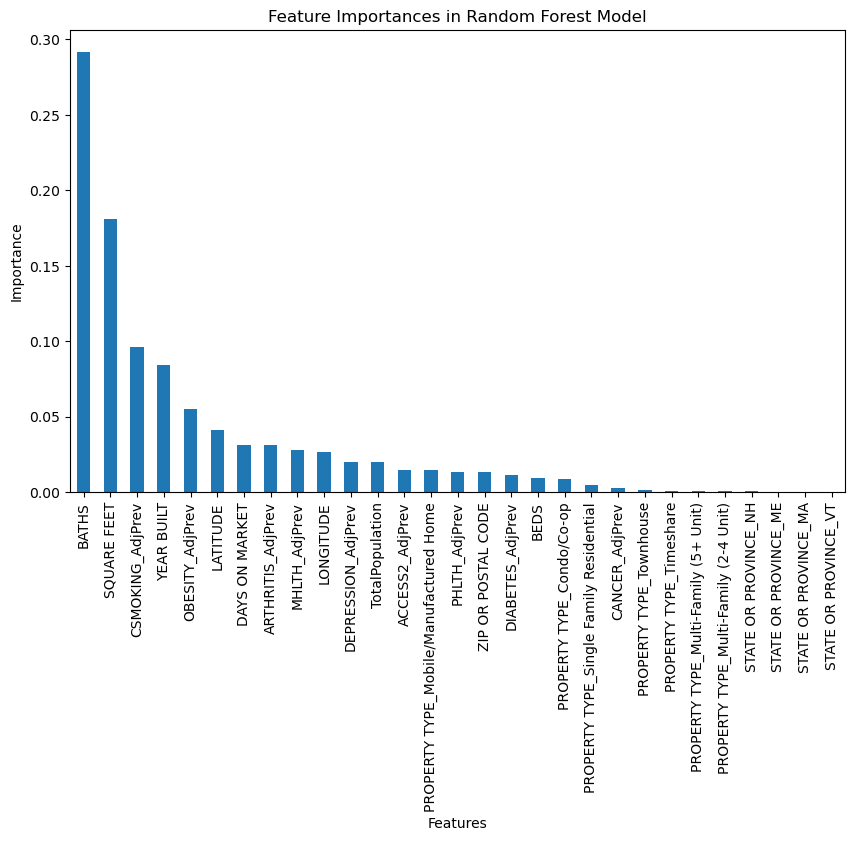

In [114]:
# Extract feature importances
feature_importances = rf_reg.feature_importances_

# Create a series with feature names and their importance
features = pd.Series(feature_importances, index = X.columns)

# Sort the features by importance
features = features.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
features.plot(kind='bar')
plt.title('Feature Importances in Random Forest Model')
plt.ylabel('Importance')
plt.xlabel('Features')

plt.show()

## <font color = darkgreen> Gradient Boosting Classifier

In [115]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------
# Define the GB model for regression
# ------------------
gb_reg = GradientBoostingRegressor(n_estimators=500,
                                   min_samples_split=5,
                                   learning_rate=0.5,
                                   min_samples_leaf=5,
                                   random_state=100)

# ------------------
# Train the model for regression
# ------------------
gb_reg.fit(X_train, y_train)

# ------------------------------------
# Make predictions on the test set
# ------------------------------------
y_pred_gb_reg = gb_reg.predict(X_test)

# ------------------------------------------------
# Evaluate the model using R-squared (R2) and RMSE
# ------------------------------------------------
r2_gb = r2_score(y_test, y_pred_gb_reg)
print('Gradient Boosting R-squared (R2):', r2_gb)

rmse_gb = mean_squared_error(y_test, y_pred_gb_reg, squared=False)
print('Gradient Boosting Root Mean Squared Error (RMSE):', rmse_gb)

Gradient Boosting R-squared (R2): 0.6580876420185648
Gradient Boosting Root Mean Squared Error (RMSE): 177389.26060745018


## <font color = darkgreen> XGBoost

In [116]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error

# ------------------
# Define the XGB model for regression
# ------------------
xgb_reg = xgb.XGBRegressor(n_estimators=100,
                           max_depth=10,
                           learning_rate=0.01,
                           min_child_weight=5,
                           random_state=100)

# ------------------
# Train the model for regression
# ------------------
xgb_reg.fit(X_train, y_train)

# ------------------------------------
# Make predictions on the test set
# ------------------------------------
y_pred_xgb_reg = xgb_reg.predict(X_test)

# ------------------------------------------------
# Evaluate the model using R-squared (R2) and RMSE
# ------------------------------------------------
r2_xgb = r2_score(y_test, y_pred_xgb_reg)
print('XGBoost R-squared (R2):', r2_xgb)

rmse_xgb = mean_squared_error(y_test, y_pred_xgb_reg, squared=False)
print('XGBoost Root Mean Squared Error (RMSE):', rmse_xgb)

XGBoost R-squared (R2): 0.5160358853221245
XGBoost Root Mean Squared Error (RMSE): 211045.6984130733


In [117]:
# Suppress warning messages
warnings.filterwarnings('ignore')

# Define the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=100)

# ---------------------------------
# Define the hyperparameter grid
# ---------------------------------
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_dist, n_iter=10, cv=5, scoring='r2', random_state=100, n_jobs=-1, return_train_score=True)

# Perform hyperparameter tuning
print("Training XGBoost...")
random_search.fit(X_train, y_train)

# Display the best parameters
best_params = random_search.best_params_
print("\nBest Parameters:", best_params)

# Train the XGBoost model with the best parameters
best_xgb_model = xgb.XGBRegressor(random_state=42, **best_params)
print("Hyperparameters of the Best Model:", best_xgb_model.get_params())
best_xgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-2 Score:", r2)

# Save all R-2 values and parameter combinations
cv_results_df = pd.DataFrame(random_search.cv_results_)
cv_results_df = cv_results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print("\nAll R-2 values and parameter combinations:")
print(cv_results_df)


Training XGBoost...

Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.8}
Hyperparameters of the Best Model: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 1, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': 5, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weigh

In [118]:
# --------------------
# Save the best model
# --------------------
with open('best_xgb_model.pkl', 'wb') as f:
    pickle.dump(best_xgb_model, f)
print("Best XGBoost model saved as 'best_xgb_model.pkl'")

# --------------------
# Load the model from disk
# --------------------
with open('best_xgb_model.pkl', 'rb') as f:
    loaded_xgb_model = pickle.load(f)

prediction = loaded_xgb_model.predict(X_test.iloc[0:])
print("\nPrediction for a new sample:", prediction)

# ------------------------------------------------
# Evaluate the model using R-squared (R2) and RMSE
# ------------------------------------------------
r2_xgb = r2_score(y_test, prediction)
print('XGBoost R-squared (R2):', r2_xgb)

rmse_xgb = mean_squared_error(y_test, prediction, squared=False)
print('XGBoost Root Mean Squared Error (RMSE):', rmse_xgb)

Best XGBoost model saved as 'best_xgb_model.pkl'

Prediction for a new sample: [ 743666.4    878631.1    797258.56   314813.     194105.8   1166266.6
  236036.64   501687.3    556946.3    449727.44   305946.88   299457.1
  665596.7    236508.78   523936.94   444352.88   391543.78   497557.5
  297944.53   861273.9    179290.83   226079.33   413484.38   404657.7
  399281.03   795806.7    766839.56   685572.9    383138.34   617035.56
  170372.89   359303.75    32268.443  352793.28  1033379.44   622006.1
  659933.7    707892.25   740278.75   491939.97   349653.75   207962.9
  355274.62   191091.77   216122.92   447800.34   673065.8    580777.3
  215386.89   583097.25    85042.39   200336.28  1037781.75   428915.2
  305644.03  1158664.1    568753.75    90788.79   338112.06   147979.44
  304595.28   197932.3     65329.594  142606.36   447930.78   266524.28
  489678.47    82207.73   478685.44   485265.25   314871.28   627570.
  340770.9    201899.31   192183.58   574996.06   729527.25   79297